# TRAFFIC ACCIDENT ANALYSIS

## Impact of Weather and Road Conditions on Accidents & Analysis of Contributing Factors

This project analyzes global traffic accident data to identify key factors affecting accident severity and frequency. Using Python, we process, explore, and visualize data to uncover trends related to weather conditions, road conditions, and accident causes.

### Import Libraries & Read Dataset ##

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "global_traffic_accidents.csv"

df = pd.read_csv(file_path)
print("Global Traffic Accidents:\n", df)

Global Traffic Accidents:
      Accident ID        Date   Time           Location   Latitude   Longitude  \
0       b0dd6f57  2023-04-19  06:39      Mumbai, India  13.488432  -73.290682   
1       debfad09  2023-01-17  02:47  São Paulo, Brazil -37.798317  -32.244242   
2       6d69aa36  2024-04-09  02:55  Sydney, Australia  33.767869  104.869018   
3       425bb1f0  2023-10-10  11:23       Tokyo, Japan  -0.378031 -165.825855   
4       90d5cf62  2023-01-02  12:07     Beijing, China  41.254879  -30.776959   
...          ...         ...    ...                ...        ...         ...   
9995    2d26c7e2  2023-01-10  18:41      Paris, France -41.344055  109.335620   
9996    4d236cfd  2023-04-04  16:48  São Paulo, Brazil -60.765148  -10.432225   
9997    1d32722f  2024-09-30  14:43     Beijing, China -11.161278  -72.164379   
9998    64722572  2024-10-27  18:34  Sydney, Australia -17.153524   20.803006   
9999    96272c1b  2024-10-26  10:30    Toronto, Canada  21.917486  100.486079   



### 1. Data Preparation

In [30]:
#Change colomn date to datetime format
df["Date"] = pd.to_datetime(df["Date"])

#Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# check duplicates
duplicate_count = df.duplicated().sum()
print("Total Duplicates:", duplicate_count)


Missing Values:
 Accident ID          0
Date                 0
Time                 0
Location             0
Latitude             0
Longitude            0
Weather Condition    0
Road Condition       0
Vehicles Involved    0
Casualties           0
Cause                0
dtype: int64
Total Duplicates: 0


## 2. Data Exploration

C:\Users\USER\AppData\Local\Temp\ipykernel_15480\2634763680.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")
C:\Users\USER\AppData\Local\Temp\ipykernel_15480\2634763680.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_counts.index, y=road_counts.values, palette="magma")


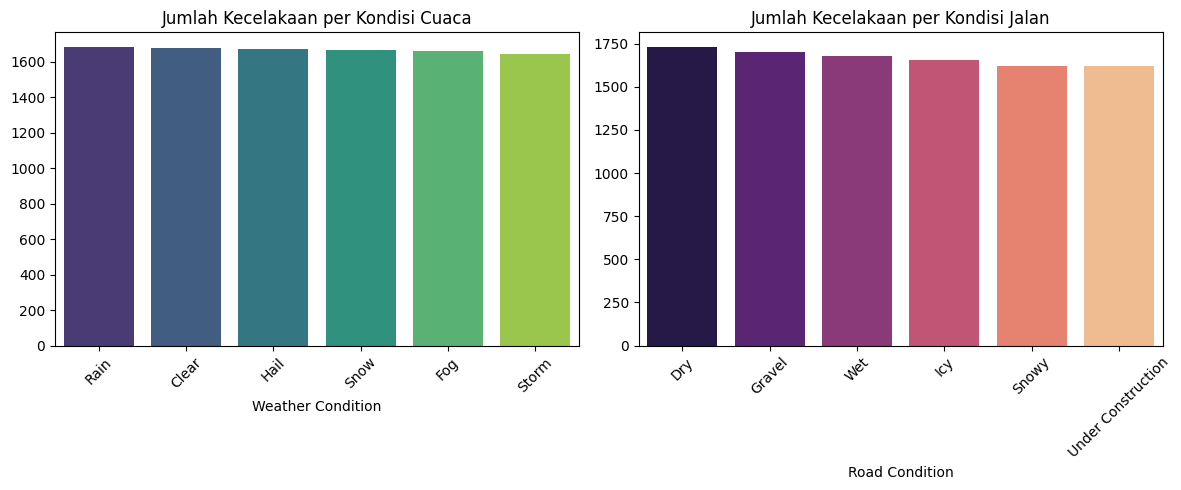


Distribution of Accidents Based on Weather:
 Weather Condition
Rain     1681
Clear    1674
Hail     1673
Snow     1667
Fog      1660
Storm    1645
Name: count, dtype: int64

Distribution of Accidents Based on Road conditions:
 Road Condition
Dry                   1729
Gravel                1702
Wet                   1680
Icy                   1653
Snowy                 1618
Under Construction    1618
Name: count, dtype: int64

Common causes of accidents:
 Cause
Drunk Driving         1716
Reckless Driving      1685
Weather Conditions    1657
Speeding              1656
Mechanical Failure    1653
Distracted Driving    1633
Name: count, dtype: int64

Statistics on the number of victims based on weather:
 Weather Condition
Clear    4.996416
Fog      5.042169
Hail     4.964136
Rain     5.027365
Snow     4.915417
Storm    4.983587
Name: Casualties, dtype: float64

Statistics on the number of victims based on road conditions:
 Road Condition
Dry                   5.111625
Gravel              

In [20]:
# calculate accidents based on weather and road condition
weather_counts = df["Weather Condition"].value_counts()
road_counts = df["Road Condition"].value_counts()

# Calculate the most common causes of accidents
cause_counts = df["Cause"].value_counts()

# Statistics on the number of victims based on road and weather conditions
casualties_by_weather = df.groupby("Weather Condition")["Casualties"].mean()
casualties_by_road = df.groupby("Road Condition")["Casualties"].mean()

# Visualization of Weather and Road Condition Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Jumlah Kecelakaan per Kondisi Cuaca")

plt.subplot(1, 2, 2)
sns.barplot(x=road_counts.index, y=road_counts.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Jumlah Kecelakaan per Kondisi Jalan")

plt.tight_layout()
plt.show()

# Print results
print("\nDistribution of Accidents Based on Weather:\n", weather_counts)
print("\nDistribution of Accidents Based on Road conditions:\n", road_counts)
print("\nCommon causes of accidents:\n", cause_counts)
print("\nStatistics on the number of victims based on weather:\n", casualties_by_weather)
print("\nStatistics on the number of victims based on road conditions:\n", casualties_by_road)

## 3. Analysis of the Relationship Between Weather & Road Conditions on Accidents

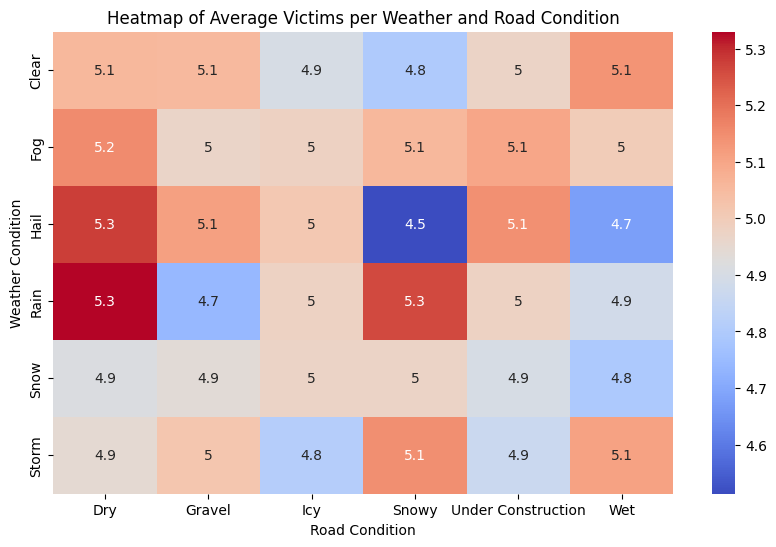

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.pivot_table(index='Weather Condition', columns='Road Condition', values='Casualties', aggfunc='mean'), cmap='coolwarm', annot=True)
plt.title("Heatmap of Average Victims per Weather and Road Condition")
plt.show()

## 4. Analysis of Accident Causes Under Specific Conditions

C:\Users\USER\AppData\Local\Temp\ipykernel_15480\484952525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cause_counts.index, x=cause_counts.values, palette='Blues_r')


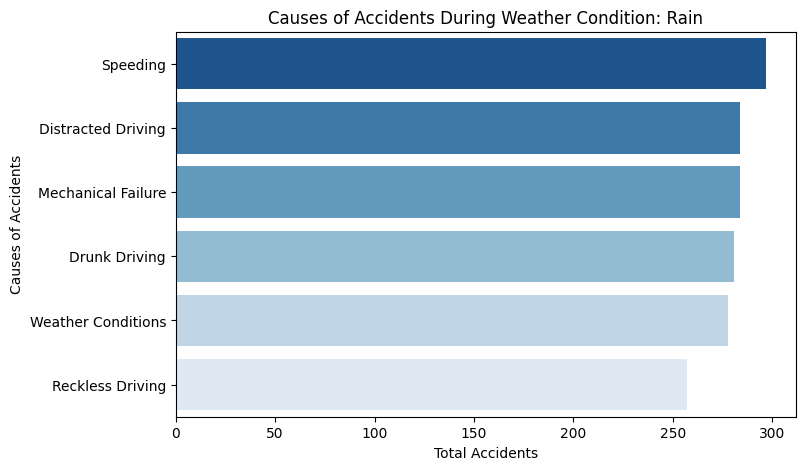

C:\Users\USER\AppData\Local\Temp\ipykernel_15480\484952525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cause_counts.index, x=cause_counts.values, palette='Blues_r')


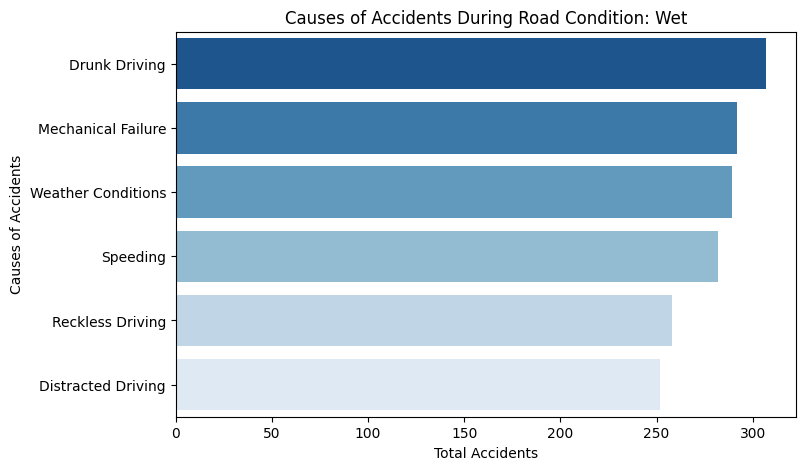

In [24]:
def plot_cause_by_condition(condition_col, condition_value):
    subset = df[df[condition_col] == condition_value]
    cause_counts = subset['Cause'].value_counts()
    
    plt.figure(figsize=(8,5))
    sns.barplot(y=cause_counts.index, x=cause_counts.values, palette='Blues_r')
    plt.xlabel("Total Accidents")
    plt.ylabel("Causes of Accidents")
    plt.title(f"Causes of Accidents During {condition_col}: {condition_value}")
    plt.show()

# Example: Causes of Accidents During Rainy & Wet Road Conditions
plot_cause_by_condition("Weather Condition", "Rain")
plot_cause_by_condition("Road Condition", "Wet")